In [1]:
# code modified from here:
# https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/Full-Archive-Tweet-Counts/full_archive_tweet_counts.py

import os
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pylab as plt
import datetime
import seaborn as sns

In [2]:
savefig_settings = {'bbox_inches': 'tight', 'facecolor': 'w', 'dpi': 150}
idx = pd.IndexSlice

## results of automatic labeling

In [3]:
tweets_classified_df = pd.read_csv("../classifier/tweets_classified4_annotated.csv", index_col=0)
print(len(tweets_classified_df))

1467983


In [4]:
# convert created_at to pd time object
def convert_str_to_datetime(datetime_string):
    return datetime.datetime.strptime(datetime_string ,"%Y-%m-%dT%H:%M:%S.%fZ")

tweets_classified_df['created_at'] = tweets_classified_df['created_at'].apply(convert_str_to_datetime)

In [5]:
# aggregate category labels

keywords_df = pd.read_csv("../data-download/Geoengineering keywords for Twitter query - review.csv", header=[1])
keywords_filtered = keywords_df[keywords_df["action after second update"] == "keep"]
subquery_ids = keywords_filtered["subquery_id"].values

for cat in keywords_filtered['category'].unique():
    print(cat)
    sids = keywords_filtered[keywords_filtered['category'] == cat]["subquery_id"].values
    tweets_classified_df[cat] = (tweets_classified_df[sids].sum(axis=1) > 0).map({True: 1, False: 0})

General
SRM
GGR


In [6]:
tweets_classified_df.head()

tid          created_at  \
lid                                           
1    647551397802737664 2015-09-25 23:20:58   
2    647551151932506113 2015-09-25 23:20:00   
3    647549503877156864 2015-09-25 23:13:27   
4    647549277401649152 2015-09-25 23:12:33   
5    647548980533022720 2015-09-25 23:11:22   

                                                  text cardiff-stance-climate  \
lid                                                                             
1    @lorabruncke @WHO @OpChemtrails @UN lie #COP21...                   none   
2    Geoengineering And The Dying Of The Trees http...                  favor   
3    @TerminatorBarbi @Airahairick @mrbangla @rocke...                  favor   
4    @OpChemtrails @UN lie #COP21 lie @Greenpeace l...                   none   
5    @canpoli @UN lie #COP21 lie @Greenpeace lie ex...                   none   

    cardiff-offensive cardiff-sentiment bertweet-sentiment geomotions-orig  \
lid                                                                          
1           offensive          negative           negative        surprise   
2       not-offensive           neutral           negative        surprise   
3       not-offensive          negative            neutral       confusion   
4           offensive          negative           negative        surprise   
5           offensive          negative           negative        surprise   

    geomotions-ekman cardiff-emotion  ... c_47 c_48 retweet_count  \
lid                                   ...                           
1            neutral           anger  ...    0    0             1   
2            neutral         sadness  ...    0    0             0   
3            neutral           anger  ...    0    0             0   
4            neutral           anger  ...    0    0             2   
5            neutral           anger  ...    0    0             0   

     reply_count  like_count  quote_count  conspiracy-filter  General  SRM  \
lid                                                                          
1              0           0            0               True        1    0   
2              0           0            0              False        1    0   
3              2           0            0              False        1    0   
4              1           2            0               True        1    0   
5              0           0            0               True        1    0   

     GGR  
lid       
1      0  
2      0  
3      0  
4      0  
5      0  

[5 rows x 100 columns]

In [7]:
tweets_classified_df.columns

Index(['tid', 'created_at', 'text', 'cardiff-stance-climate',
       'cardiff-offensive', 'cardiff-sentiment', 'bertweet-sentiment',
       'geomotions-orig', 'geomotions-ekman', 'cardiff-emotion',
       'bertweet-emotions', 'nrc', 'nrc-highest', 'nrc-score', 'g_01', 'g_02',
       'g_05', 'g_06', 's_01', 's_02', 's_21', 's_22', 's_27', 's_04', 's_07',
       's_09', 's_20', 's_23', 's_24', 's_10', 's_11', 's_25', 's_30', 's_12',
       's_14', 's_16', 's_17', 's_18', 's_19', 's_29', 'c_01', 'c_02', 'c_03',
       'c_04', 'c_05', 'c_06', 'c_07', 'c_08', 'c_55', 'c_10', 'c_11', 'c_12',
       'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_54', 'c_09',
       'c_20', 'c_21', 'c_22', 'c_50', 'c_23', 'c_49', 'c_24', 'c_25', 'c_26',
       'c_51', 'c_27', 'c_29', 'c_30', 'c_31', 'c_32', 'c_33', 'c_36', 'c_37',
       'c_38', 'c_39', 'c_40', 'c_41', 'c_42', 'c_43', 'c_52', 'c_53', 'c_44',
       'c_45', 'c_46', 'c_47', 'c_48', 'retweet_count', 'reply_count',
       'like_count',

In [8]:
# count retweets, replies, likes, quotes

tweets_classified_df[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum()

retweet_count    1924166
reply_count       461766
like_count       4268598
quote_count       192376
dtype: int64

In [9]:
tweets_classified_df[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum() / len(tweets_classified_df)

retweet_count    1.310755
reply_count      0.314558
like_count       2.907798
quote_count      0.131048
dtype: float64

In [10]:
# export random sample for cross checking

ids = np.random.choice(len(tweets_classified_df), 100, replace=False)

In [11]:
tweets_classified_df.loc[ids].to_csv("../classifier/tweets_classified_random_sample100.csv")

In [12]:
# check counts
tweets_classified_df["cardiff-sentiment"].value_counts()

neutral     931686
negative    338337
positive    197960
Name: cardiff-sentiment, dtype: int64

In [13]:
tweets_classified_df["cardiff-emotion"].value_counts()

optimism    579827
anger       386030
sadness     306153
joy         195973
Name: cardiff-emotion, dtype: int64

In [14]:
tweets_classified_df["geomotions-ekman"].value_counts() #.plot.bar()

neutral     1174550
joy          185387
surprise      56472
anger         34105
fear           8547
sadness        7434
disgust        1488
Name: geomotions-ekman, dtype: int64

In [15]:
tweets_classified_df["geomotions-orig"].value_counts()

surprise          1123856
approval            64845
admiration          43558
curiosity           33793
neutral             26889
confusion           25457
disapproval         21612
annoyance           20757
gratitude           19005
pride               14195
caring              11081
disappointment       8950
sadness              7641
fear                 6928
anger                6447
desire               6284
excitement           6193
love                 4617
amusement            4420
joy                  2920
remorse              2729
disgust              1904
relief               1316
optimism             1073
nervousness           716
embarrassment         610
realization           186
grief                   1
Name: geomotions-orig, dtype: int64

In [16]:
tweets_classified_df["bertweet-emotions"].value_counts()

others      1236294
disgust      109933
joy           49429
fear          39790
anger         24782
surprise       5553
sadness        2202
Name: bertweet-emotions, dtype: int64

In [17]:
tweets_classified_df["nrc-highest"].value_counts()

neutral         574070
positive        282606
negative        183802
fear            176264
trust           158295
anger            39863
anticipation     31534
surprise         13952
sadness           6894
disgust            605
joy                 98
Name: nrc-highest, dtype: int64

In [18]:
tweets_classified_df["nrc"].isna().sum()

574070

<AxesSubplot:>

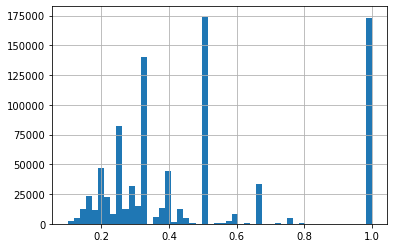

In [19]:
tweets_classified_df["nrc-score"].hist(bins=50)

In [20]:
# compare to counts by tim for consistency -> checked!
count_dict_tim = {'cardiff-stance-climate': {'none': 401220, 'favor': 1066763}, 
 'cardiff-offensive': {'offensive': 44852, 'not-offensive': 1423131},
 'cardiff-sentiment': {'negative': 338337, 'neutral': 931686, 'positive': 197960},
 'bertweet-sentiment': {'negative': 376438, 'neutral': 896848, 'positive': 194697},
 'geomotions-orig': {'surprise': 1123856, 'confusion': 25457, 'curiosity': 33793, 'fear': 6928, 'disgust': 1904, 'gratitude': 19005, 'excitement': 6193, 'approval': 64845, 'anger': 6447, 'admiration': 43558, 'disappointment': 8950, 'remorse': 2729, 'neutral': 26889, 'amusement': 4420, 'desire': 6284, 'caring': 11081, 'annoyance': 20757, 'disapproval': 21612, 'sadness': 7641, 'embarrassment': 610, 'love': 4617, 'nervousness': 716, 'joy': 2920, 'pride': 14195, 'relief': 1316, 'optimism': 1073, 'realization': 186, 'grief': 1},
 'geomotions-ekman': {'neutral': 1174550, 'fear': 8547, 'joy': 185387, 'disgust': 1488, 'surprise': 56472, 'anger': 34105, 'sadness': 7434},
 'cardiff-emotion': {'anger': 386030, 'sadness': 306153, 'optimism': 579827, 'joy': 195973},
 'bertweet-emotions': {'anger': 24782, 'others': 1236294, 'disgust': 109933, 'fear': 39790, 'joy': 49429, 'sadness': 2202, 'surprise': 5553},
 'nrc': {'fear': 327889, 'anger': 238695, 'negative': 562795, 'sadness': 259782, 'disgust': 185412, 'anticipation': 329305, 'positive': 593580, 'trust': 403964, 'joy': 222798, 'surprise': 161042}
 }

In [21]:
for key in count_dict_tim:
    print(key)
    labels = count_dict_tim[key]
    counter = 0
    for label in labels:
        counter += labels[label]
    print(counter)

cardiff-stance-climate
1467983
cardiff-offensive
1467983
cardiff-sentiment
1467983
bertweet-sentiment
1467983
geomotions-orig
1467983
geomotions-ekman
1467983
cardiff-emotion
1467983
bertweet-emotions
1467983
nrc
3285262


## map high dimensional emotions

In [22]:
tweets_classified_df['geomotions-ekman-tertiary'] = tweets_classified_df['geomotions-ekman'].map({'neutral': 'neutral',
                                               'joy': 'positive',
                                                'surprise': 'neutral',
                                                'anger': 'negative',
                                                'fear': 'negative',
                                                'sadness': 'negative',
                                                'disgust': 'negative'})

In [23]:
tweets_classified_df['cardiff-emotion-tertiary'] = tweets_classified_df['cardiff-emotion'].map({
'optimism': 'neutral',
'anger': 'negative',
'sadness': 'negative',
'joy': 'positive'
})

In [24]:
tweets_classified_df["nrc-highest-tertiary"] = tweets_classified_df["nrc-highest"].map({
'neutral': 'neutral',
'positive': 'positive',
'negative': 'negative',
'fear': 'negative',
'trust': 'positive',
'anger': 'negative',
'anticipation': 'positive',
'surprise': 'neutral',
'sadness': 'negative',
'disgust': 'negative',
'joy': 'positive'
})

In [25]:
tweets_classified_df["bertweet-emotions-tertiary"] = tweets_classified_df["bertweet-emotions"].map({
'others': 'neutral',
'disgust': 'negative',
'joy': 'positive',
'fear': 'negative',
'anger': 'negative',
'surprise': 'neutral',
'sadness': 'negative'})

In [26]:
# compare: cardiff-sentiment, bertweet-sentiment, geomotions-ekman,
# cardiff-emotion, bertweet-emotions, nrc-

In [27]:
tweets_classified_df[['cardiff-sentiment', 'bertweet-sentiment', 'nrc-highest-tertiary',
'cardiff-emotion-tertiary', 'geomotions-ekman-tertiary', 'bertweet-emotions-tertiary']]

cardiff-sentiment bertweet-sentiment nrc-highest-tertiary  \
lid                                                                 
1                negative           negative             negative   
2                 neutral           negative              neutral   
3                negative            neutral             positive   
4                negative           negative             negative   
5                negative           negative             negative   
...                   ...                ...                  ...   
1467979           neutral            neutral             negative   
1467980           neutral            neutral             positive   
1467981           neutral            neutral              neutral   
1467982          positive            neutral             positive   
1467983           neutral            neutral             positive   

        cardiff-emotion-tertiary geomotions-ekman-tertiary  \
lid                                                          
1                       negative                   neutral   
2                       negative                   neutral   
3                       negative                   neutral   
4                       negative                   neutral   
5                       negative                   neutral   
...                          ...                       ...   
1467979                  neutral                   neutral   
1467980                  neutral                   neutral   
1467981                 negative                   neutral   
1467982                  neutral                   neutral   
1467983                  neutral                  positive   

        bertweet-emotions-tertiary  
lid                                 
1                         negative  
2                          neutral  
3                         negative  
4                         negative  
5                         negative  
...                            ...  
1467979                    neutral  
1467980                    neutral  
1467981                    neutral  
1467982                    neutral  
1467983                    neutral  

[1467983 rows x 6 columns]

## compare different classifiers

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [26]:
classifiers = ['cardiff-sentiment', 'bertweet-sentiment', 'nrc-highest-tertiary',
'cardiff-emotion-tertiary', 'geomotions-ekman-tertiary', 'bertweet-emotions-tertiary']
pairs = list(itertools.combinations(classifiers, 2))

cardiff-sentiment bertweet-sentiment
cardiff-sentiment nrc-highest-tertiary
cardiff-sentiment cardiff-emotion-tertiary
cardiff-sentiment geomotions-ekman-tertiary
cardiff-sentiment bertweet-emotions-tertiary
bertweet-sentiment nrc-highest-tertiary
bertweet-sentiment cardiff-emotion-tertiary
bertweet-sentiment geomotions-ekman-tertiary
bertweet-sentiment bertweet-emotions-tertiary
nrc-highest-tertiary cardiff-emotion-tertiary
nrc-highest-tertiary geomotions-ekman-tertiary
nrc-highest-tertiary bertweet-emotions-tertiary
cardiff-emotion-tertiary geomotions-ekman-tertiary
cardiff-emotion-tertiary bertweet-emotions-tertiary
geomotions-ekman-tertiary bertweet-emotions-tertiary


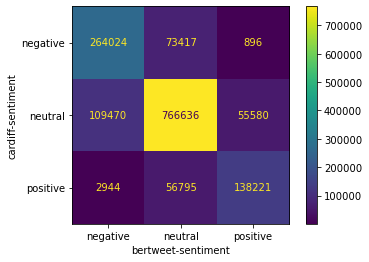

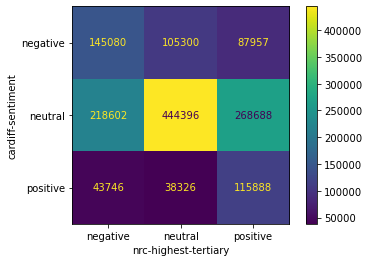

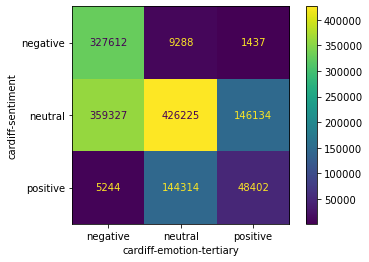

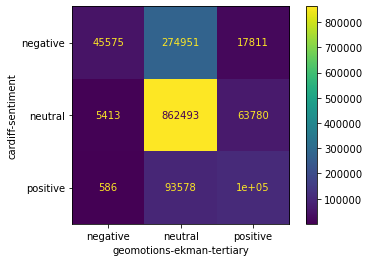

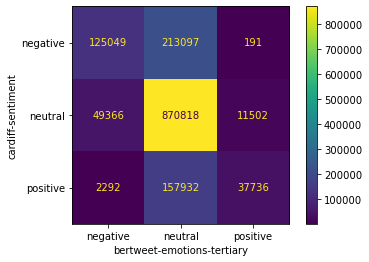

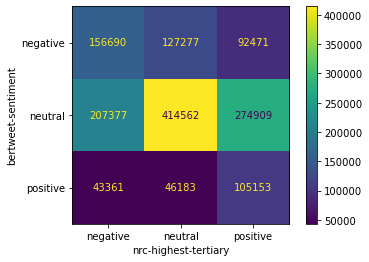

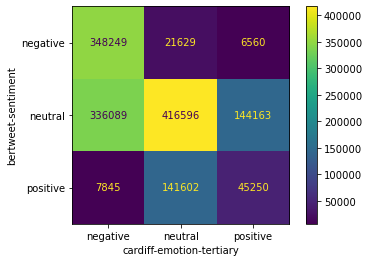

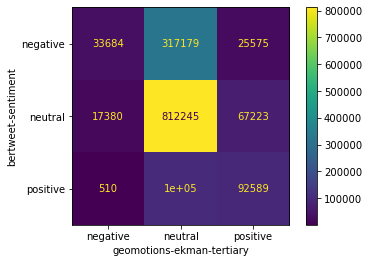

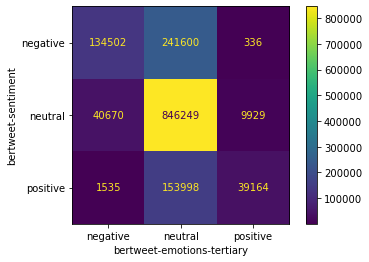

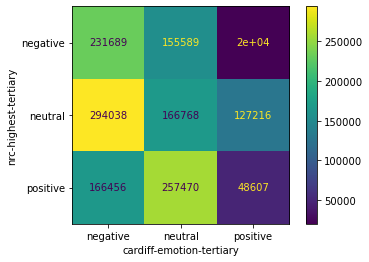

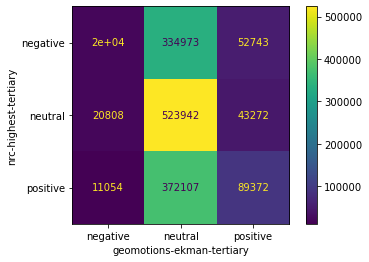

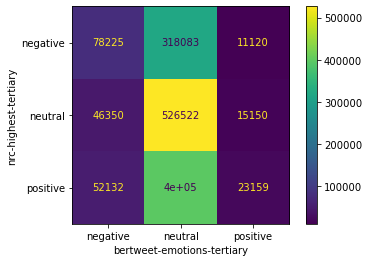

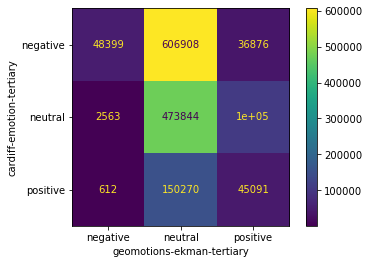

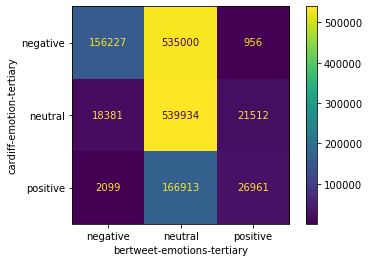

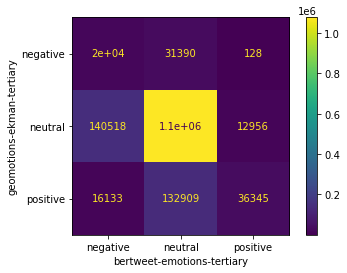

In [27]:
#pairs = ['cardiff-sentiment', 'bertweet-sentiment']

for classifier1, classifier2 in pairs:
    print(classifier1, classifier2)

    labels = np.sort(tweets_classified_df[classifier1].unique())
    cm = confusion_matrix(tweets_classified_df[classifier1],
                          tweets_classified_df[classifier2],
                          labels=labels)

    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot()
    plt.xlabel(classifier2)
    plt.ylabel(classifier1)
    plt.savefig("figures/comparison/comparison_matrix_{}-{}.png".format(classifier1, classifier2), **savefig_settings)

## compare with human annotation

In [107]:
files = ["../labeling/intercoder comparison_sample1.xlsx",
         "../labeling/intercoder comparison_sample2.xlsx",
         "../labeling/intercoder comparison_srm_sample.xlsx",
         "../labeling/intercoder comparison_ggr_sample.xlsx"]

sample_names = ["General1", "General2", "SRM", "GGR"]
dfs = []

for i, file in enumerate(files):
    temp_df = pd.read_excel(file, sheet_name="comparison")
    temp_df["sample"] = sample_names[i]
    dfs.append(temp_df)
    
an = pd.concat(dfs)

In [108]:
print(len(an))
an = an[~an["tweet__id"].isna()]
print(len(an))
an.head()

6091
6086


tweet__id                                        tweet__text  \
0  9.504236e+17  Geoengineering Watch Global Alert News, Januar...   
1  9.504236e+17  Geoengineering Watch Global Alert News, Januar...   
2  9.504236e+17  Geoengineering Watch Global Alert News, Januar...   
3  9.504236e+17  Geoengineering Watch Global Alert News, Januar...   
4  9.504236e+17  Geoengineering Watch Global Alert News, Januar...   

    tweet__created_at Category Name  SeanLow  brutschin@iiasa.ac.at  \
0 2018-01-08 17:47:01  0 - relevant      NaN                    NaN   
1 2018-01-08 17:47:01  2 - Negative      NaN                    NaN   
2 2018-01-08 17:47:01   2 - Neutral      NaN                    NaN   
3 2018-01-08 17:47:01  2 - Positive      NaN                    NaN   
4 2018-01-08 17:47:01     3 - Anger      NaN                    NaN   

   cmbaum@btech.au.dk  galm  lueck@mcc-berlin.net  muef  ...  average  \
0                 NaN   1.0                   NaN   1.0  ...      NaN   
1                 NaN   0.0                   NaN   1.0  ...      NaN   
2                 NaN   1.0                   NaN   0.0  ...      NaN   
3                 NaN   0.0                   NaN   0.0  ...      NaN   
4                 NaN   0.0                   NaN   0.0  ...      NaN   

   sentiment sentiment.1  sentiment.2  emotion  emotion.1  emotion.2  stance  \
0        NaN         NaN          NaN      NaN        NaN        NaN     NaN   
1        NaN         NaN          NaN      NaN        NaN        NaN     NaN   
2        NaN         NaN          NaN      NaN        NaN        NaN     NaN   
3        NaN         NaN          NaN      NaN        NaN        NaN     NaN   
4        NaN         NaN          NaN      NaN        NaN        NaN     NaN   

   stance.1  stance.2  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 24 columns]

<AxesSubplot:>

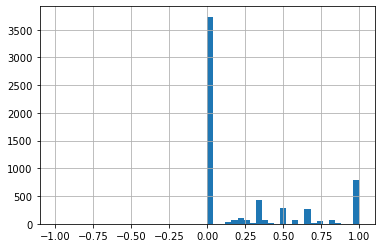

In [109]:
# aggregate labels

users = [user for user in  ["SeanLow", "brutschin@iiasa.ac.at", "galm",
                                              "jcroberts4@wisc.edu", "lueck@mcc-berlin.net",
                                              "muef", "repke@mcc-berlin.net"] if user in an.columns]
an["average"] = an[users].mean(axis=1)
an["average"].hist(bins=50)

In [110]:
annotation_dict = {'annotated-relevant': ['0 - relevant'],
                   'annotated-sentiment': ['2 - Negative', '2 - Neutral', '2 - Positive'],
       'annotated-emotion': ['3 - Anger', '3 - Disgust', '3 - Fear', '3 - Joy',
       '3 - Other or none', '3 - Sadness', '3 - Surprise'],
       'annotated-stance': ['4 - Contra','4 - Neutral', '4 - Pro'],
       'annotated-conspiracy': ['5 - Yes'],
       'annotated-spam': ['6 - Yes']}

In [111]:
for annotation in annotation_dict:
    an[annotation] = '' #np.nan
    for label in annotation_dict[annotation]:
        an.loc[(an["average"] > 0.5) & (an['Category Name'] == label), annotation] = label

In [112]:
#an[~an["annotated-sentiment"].isna()]

In [113]:
agg = []

for annotation in list(annotation_dict.keys()):
    agg.append(an.groupby('tweet__id')[annotation].aggregate(lambda x: ''.join(x)))

agg.append(an.set_index('tweet__id')["tweet__text"].drop_duplicates())
agg.append(an.drop_duplicates(subset=['tweet__id', 'sample']).set_index('tweet__id')["sample"])

agg = pd.concat(agg, axis=1)

In [114]:
for annotation in list(annotation_dict.keys()):
    print(agg[annotation].value_counts())

0 - relevant    359
                 40
Name: annotated-relevant, dtype: int64
                174
2 - Negative    117
2 - Neutral      87
2 - Positive     21
Name: annotated-sentiment, dtype: int64
3 - Other or none       243
                         98
3 - Anger                22
3 - Fear                 18
3 - Surprise              4
3 - Anger3 - Disgust      4
3 - Anger3 - Fear         4
3 - Joy                   3
3 - Disgust               3
Name: annotated-emotion, dtype: int64
               162
4 - Contra     138
4 - Neutral     68
4 - Pro         31
Name: annotated-stance, dtype: int64
           272
5 - Yes    127
Name: annotated-conspiracy, dtype: int64
    399
Name: annotated-spam, dtype: int64


In [115]:
agg['annotated-emotion-tertiary'] = agg['annotated-emotion'].map({'3 - Other or none': 'neutral',
                                       '': 'no agreement',
                                       '3 - Anger': 'negative',
                                       '3 - Fear': 'negative',
                                       '3 - Surprise': 'neutral',
                                       '3 - Anger3 - Disgust': 'negative',
                                       '3 - Anger3 - Fear': 'negative',
                                       '3 - Joy': 'positive',
                                       '3 - Disgust': 'negative'})
agg['annotated-emotion-tertiary'].value_counts()

neutral         247
no agreement     98
negative         51
positive          3
Name: annotated-emotion-tertiary, dtype: int64

In [116]:
agg = agg.reset_index()
agg["tweet__id"] = agg["tweet__id"].astype(int)

In [117]:
merged_an = pd.merge(tweets_classified_df, agg.reset_index(),
            left_on='tid',
            right_on='tweet__id',
            how='inner')
print(len(merged_an))

13


In [118]:
merged_an['text identical'] = (merged_an['text'] == merged_an['tweet__text'])

In [119]:
merged_an[['tid', 'text', 'tweet__id', 'tweet__text', 'text identical']]

tid                                               text  \
0   1297911818237521920  Solar Forcing  Geoengineering  Storm Alerts | ...   
1   1225242579014320128  @quasimodem1951 @DawnTJ90 Am I the first one t...   
2   1103819030270337024  @united @Delta @WestJet you are criminals spra...   
3    990245563764477952  #Enjoy the #blueskies while you can this #Satu...   
4    980646113354031104  @SkyWeatherAUS WATCH &amp; Understand What You...   
5    957045355463426048  The engineers are painting our sky white. #che...   
6    955534378733654016  If we start deliberately cooling the Earth  we...   
7    950423612636450816  Geoengineering Watch Global Alert News  Januar...   
8   1208894596152999936  @LionelMedia Idiots will call Chemtrails a con...   
9   1419183131031130112  The potential solution to global warming? It c...   
10  1241717934348795904  Solar geoengineering involves directly cooling...   
11  1259543046699520000  @RokJohannes I believe it was BRENNAN in an in...   
12  1156332376634449920  Wetlands bury carbon. They'll store more 'blue...   

              tweet__id                                        tweet__text  \
0   1297911818237521920  Solar Forcing, Geoengineering, Storm Alerts | ...   
1   1225242579014320128  Am I the first one then? By the way...it's cal...   
2   1103819030270337024  @united @Delta @WestJet you are criminals spra...   
3    990245563764477952  #Enjoy the #blueskies while you can this #Satu...   
4    980646113354031104  @SkyWeatherAUS WATCH &amp; Understand What You...   
5    957045355463426048  The engineers are painting our sky white. #che...   
6    955534378733654016  If we start deliberately cooling the Earth, we...   
7    950423612636450816  Geoengineering Watch Global Alert News, Januar...   
8   1208894596152999936  @LionelMedia Idiots will call Chemtrails a con...   
9   1419183131031130112  The potential solution to global warming? It c...   
10  1241717934348795904  Solar geoengineering involves directly cooling...   
11  1259543046699520000  @RokJohannes I believe it was BRENNAN in an in...   
12  1156332376634449920  Wetlands bury carbon. They'll store more 'blue...   

    text identical  
0            False  
1            False  
2             True  
3            False  
4            False  
5             True  
6            False  
7            False  
8            False  
9            False  
10           False  
11           False  
12           False

In [120]:
# double check overlap between ids
annotated_set = set(agg['tweet__id'])
entire_set = set(tweets_classified_df['tid'])
print(len(annotated_set.intersection(entire_set)))

13


In [121]:
# todo: do fuzzy matching on text

In [122]:
sample_names

['General1', 'General2', 'SRM', 'GGR']

In [125]:
# for now, only look at frequencies for relevant

sample_name = [['General1', 'General2'], ['General1'], ['General2'], ['SRM'], ['GGR'],
               ['General1', 'General2', 'SRM', 'GGR']][5]

print(sample_name)
for annotation in list(annotation_dict.keys()):
    counts = agg[(agg['sample'].isin(sample_name)) &
                 (agg['annotated-relevant'] == '0 - relevant')][annotation].value_counts()
    print(counts.sum())
    pct = 100 * counts /counts.sum()
    print(pct)
    
    if annotation == 'annotated-emotion':
        print(pct[~pct.index.isin(["", "3 - Other or none", "3 - Surprise", "3 - Joy"])].index)
        print(pct[~pct.index.isin(["", "3 - Other or none", "3 - Surprise", "3 - Joy"])].sum())

print()

['General1', 'General2', 'SRM', 'GGR']
359
0 - relevant    100.0
Name: annotated-relevant, dtype: float64
359
                38.718663
2 - Negative    32.311978
2 - Neutral     23.119777
2 - Positive     5.849582
Name: annotated-sentiment, dtype: float64
359
3 - Other or none       63.231198
                        20.891365
3 - Anger                6.128134
3 - Fear                 4.735376
3 - Surprise             1.114206
3 - Anger3 - Disgust     1.114206
3 - Anger3 - Fear        1.114206
3 - Joy                  0.835655
3 - Disgust              0.835655
Name: annotated-emotion, dtype: float64
Index(['3 - Anger', '3 - Fear', '3 - Anger3 - Disgust', '3 - Anger3 - Fear',
       '3 - Disgust'],
      dtype='object')
13.92757660167131
359
4 - Contra     37.604457
               35.376045
4 - Neutral    18.384401
4 - Pro         8.635097
Name: annotated-stance, dtype: float64
359
           65.45961
5 - Yes    34.54039
Name: annotated-conspiracy, dtype: float64
359
    100.0
Name: anno